In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('StudentData.csv')
data.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


# Basic Questions

## 1. How many unique students are included in the dataset?


In [214]:
unique_students = data['First Name'].nunique()
print(f"There are {unique_students} unique students in the dataset.")

There are 2324 unique students in the dataset.


## <span style='color:Green'>Conclusion </span> : There are 2324 unique students in the dataset.

## 2. What is the average GPA of the students?

In [215]:
average_gpa = data['CGPA'].mean().round(2)
print(f"The average GPA of students is {average_gpa}")

The average GPA of students is 8.04


## <span style='color:Green'>Conclusion </span> : The average GPA of students is 8.04

## 3. What is the distribution of students across different graduation years?

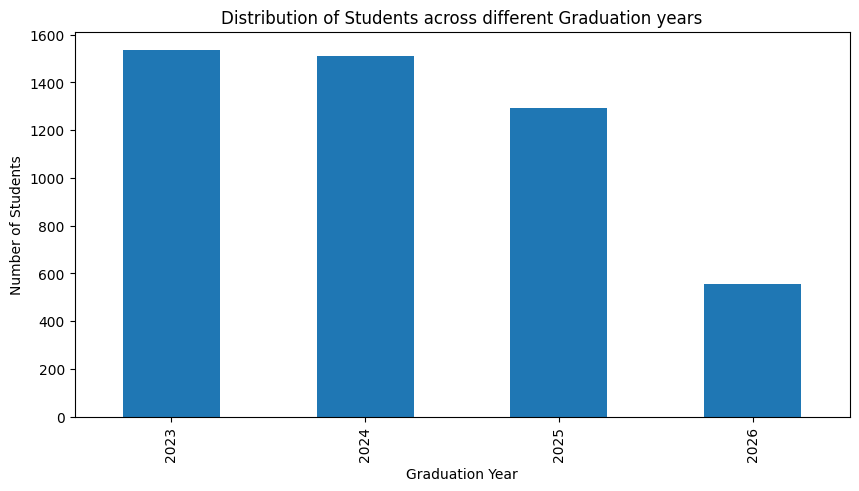

In [216]:
students_graduation_yr = data['Year of Graduation'].value_counts()

plt.figure(figsize=(10,5))
students_graduation_yr.plot(kind='bar')
plt.title('Distribution of Students across different Graduation years')
plt.xlabel('Graduation Year')
plt.ylabel('Number of Students')
plt.show()

## <span style='color:Green'>Conclusion </span> : 2023 has the most number of students graduating while the number decreases as the years go by. 

## 4.What is the distribution of student's experience with Python programming?

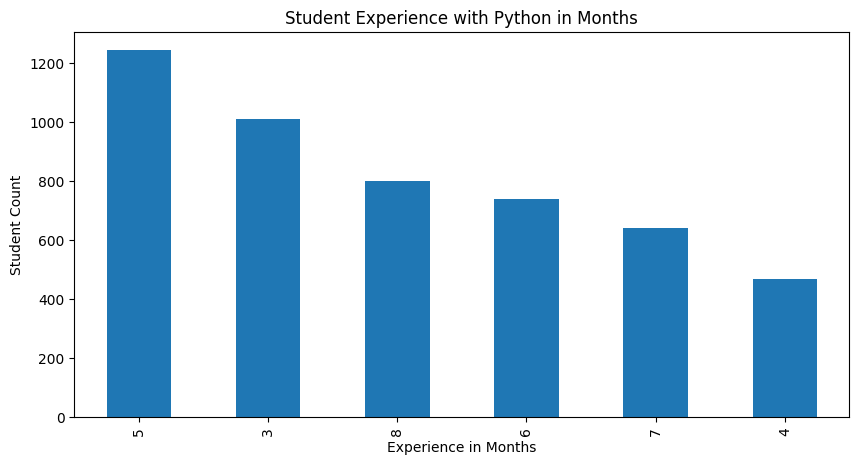

In [217]:
python_student_exp = data['Experience with python (Months)'].value_counts()

plt.figure(figsize=(10,5))
python_student_exp.plot(kind='bar')
plt.title('Student Experience with Python in Months')
plt.xlabel('Experience in Months')
plt.ylabel('Student Count')
plt.show()

## <span style='color:Green'>Conclusion </span> : Most student have a experience of 5 Months

## 5.What is the average family income of the student?

In [218]:
income_labels = data['Family Income'].unique()
print(income_labels)

['7 Lakh+' '0-2 Lakh' '5-7 Lakh' '2-5 Lakh']


In [219]:
import re
def convert_income_range(income_range):
    if pd.isna(income_range):
        return np.NAN
    elif income_range == "7 Lakh+":
        return 7.5
    elif '-' in income_range:
        income_range = re.split(r'[-\s]', income_range)
        lower_bound = float(income_range[0])
        upper_bound = float(income_range[1].replace('Lakh',''))
        return (lower_bound + upper_bound)/2
    else:
        income_range = income_range.replace('Lakh','')
        return float(income_range)
    
data['Family Income'] = data['Family Income'].apply(convert_income_range)
avg_family_income = data['Family Income'].mean()
print(f"Average family income is {avg_family_income:.2f} Lakh")

Average family income is 1.30 Lakh


## <span style='color:Green'>Conclusion </span> : Average family income is 1.30 Lakh

## 6. How does the GPA vary among different colleges? (Show top 5 results only)

<Figure size 10000x10000 with 0 Axes>

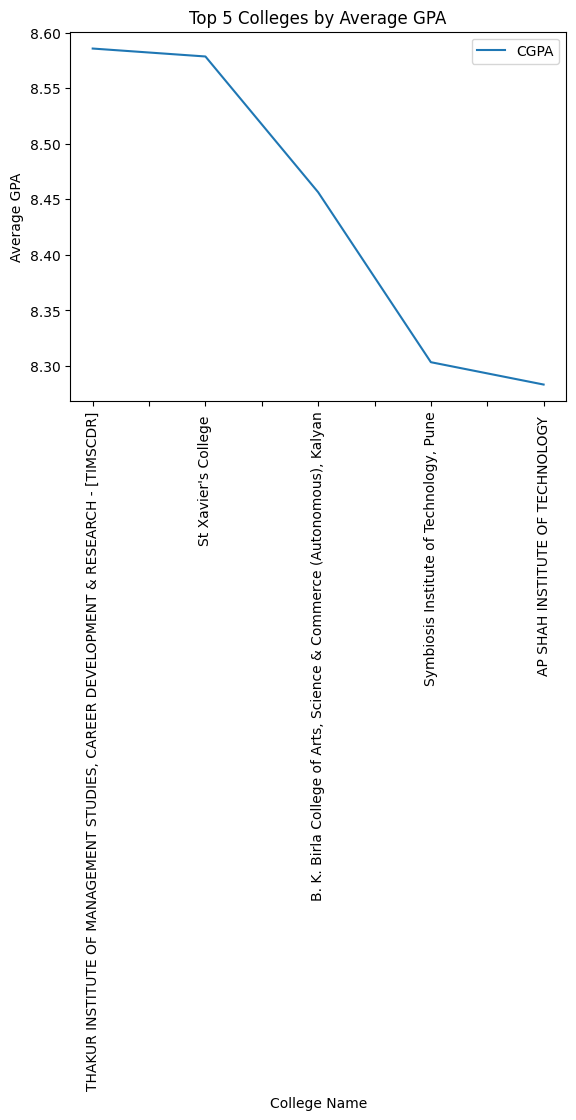

In [220]:
average_gpa_by_college = data.groupby('College Name')['CGPA'].mean().reset_index()
top_5_college_by_gpa = average_gpa_by_college.sort_values(by='CGPA',ascending=False).head(5)
top_5_college_by_gpa_df = pd.DataFrame({'College Name': top_5_college_by_gpa['College Name'],
                                        'Average GPA': top_5_college_by_gpa['CGPA']})
plt.figure(figsize=(100, 100))
top_5_college_by_gpa.set_index('College Name').plot(kind='line')
plt.title('Top 5 Colleges by Average GPA')
plt.xlabel('College Name')
plt.ylabel('Average GPA')
plt.xticks(rotation=90)
plt.show()


## <span style='color:Green'>Conclusion </span> : THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR] has the highest average CGPA followed by the others.

## 7. Are there any outliers in the quantity (number of courses completed) attribute?

In [221]:
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 - (1.5 * iqr)

outliers = data[(data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound)]
if outliers.empty:
    print("No outliers found")
else:
        print("Outliers found")

No outliers found


## <span style='color:Green'>Conclusion </span> : There were no outliers found.

## 8. What is the average GPA for student from each city?

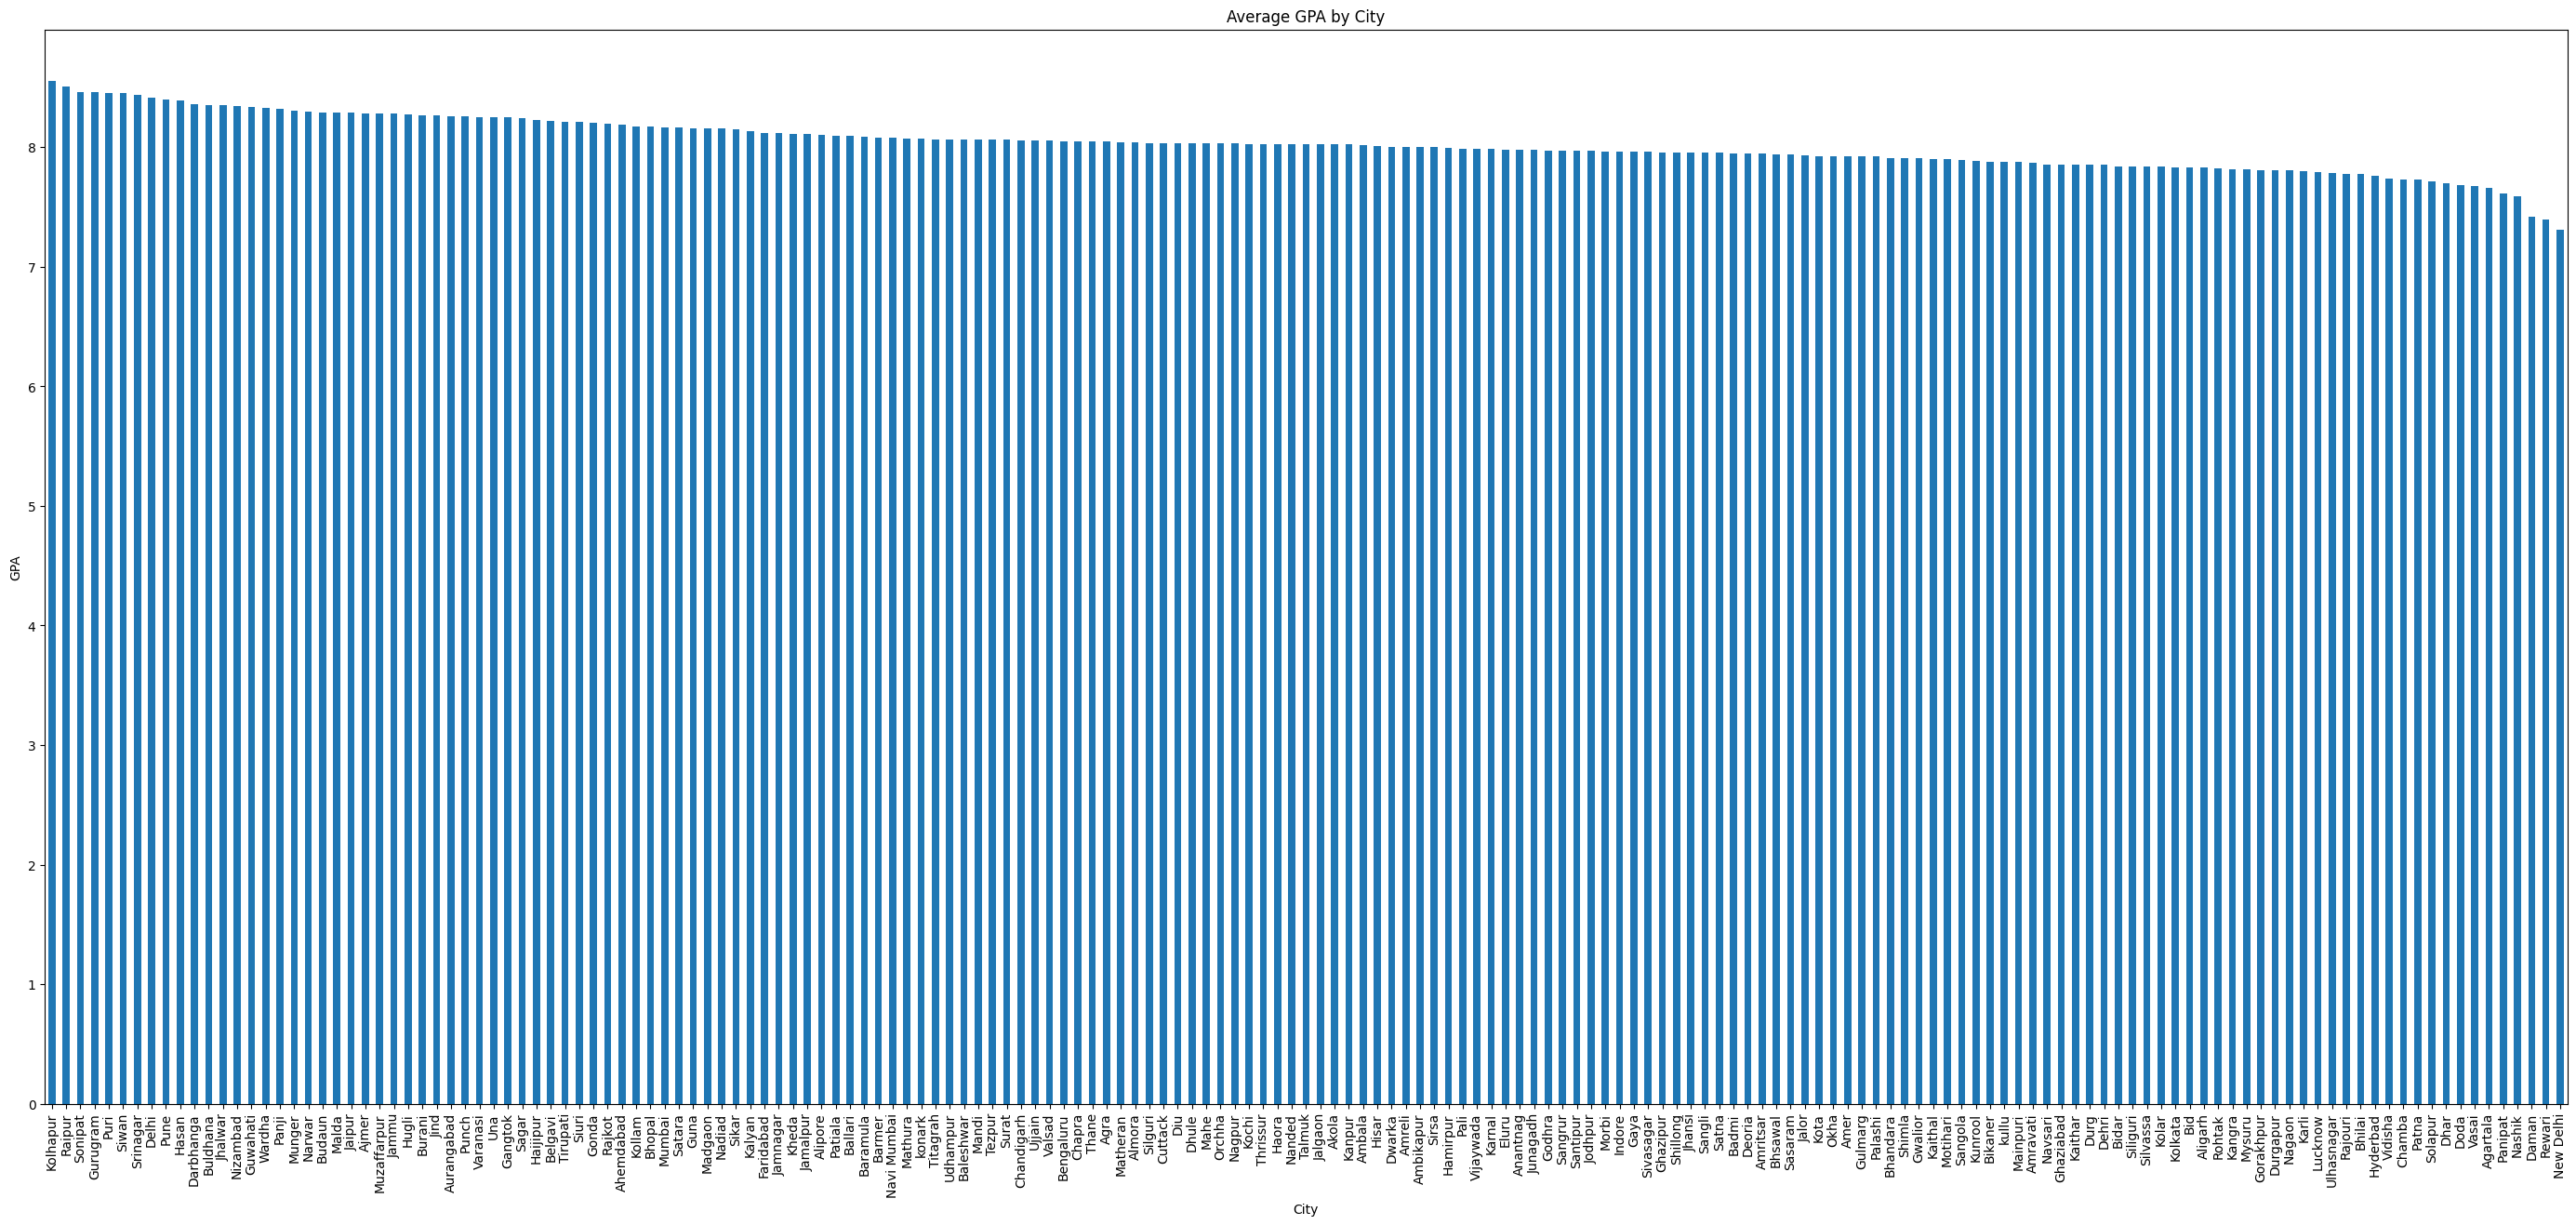

In [222]:

average_gpa_by_city = data.groupby('City')['CGPA'].mean()
average_gpa_by_city.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(35, 15))
average_gpa_by_city.plot(kind='bar')
plt.title('Average GPA by City')
plt.xlabel('City')
plt.ylabel('GPA')
plt.show()
average_gpa_by_city = pd.DataFrame(average_gpa_by_city)


In [223]:
average_gpa_by_city

,CGPA
City,
Kolhapur,8.557143
Raipur,8.507143
Sonipat,8.464286
Gurugram,8.459259
Puri,8.450000
...,...
Panipat,7.615385
Nashik,7.592857
Daman,7.421429


## 9. How many students from various cities? (Solve using data visualisation tool).

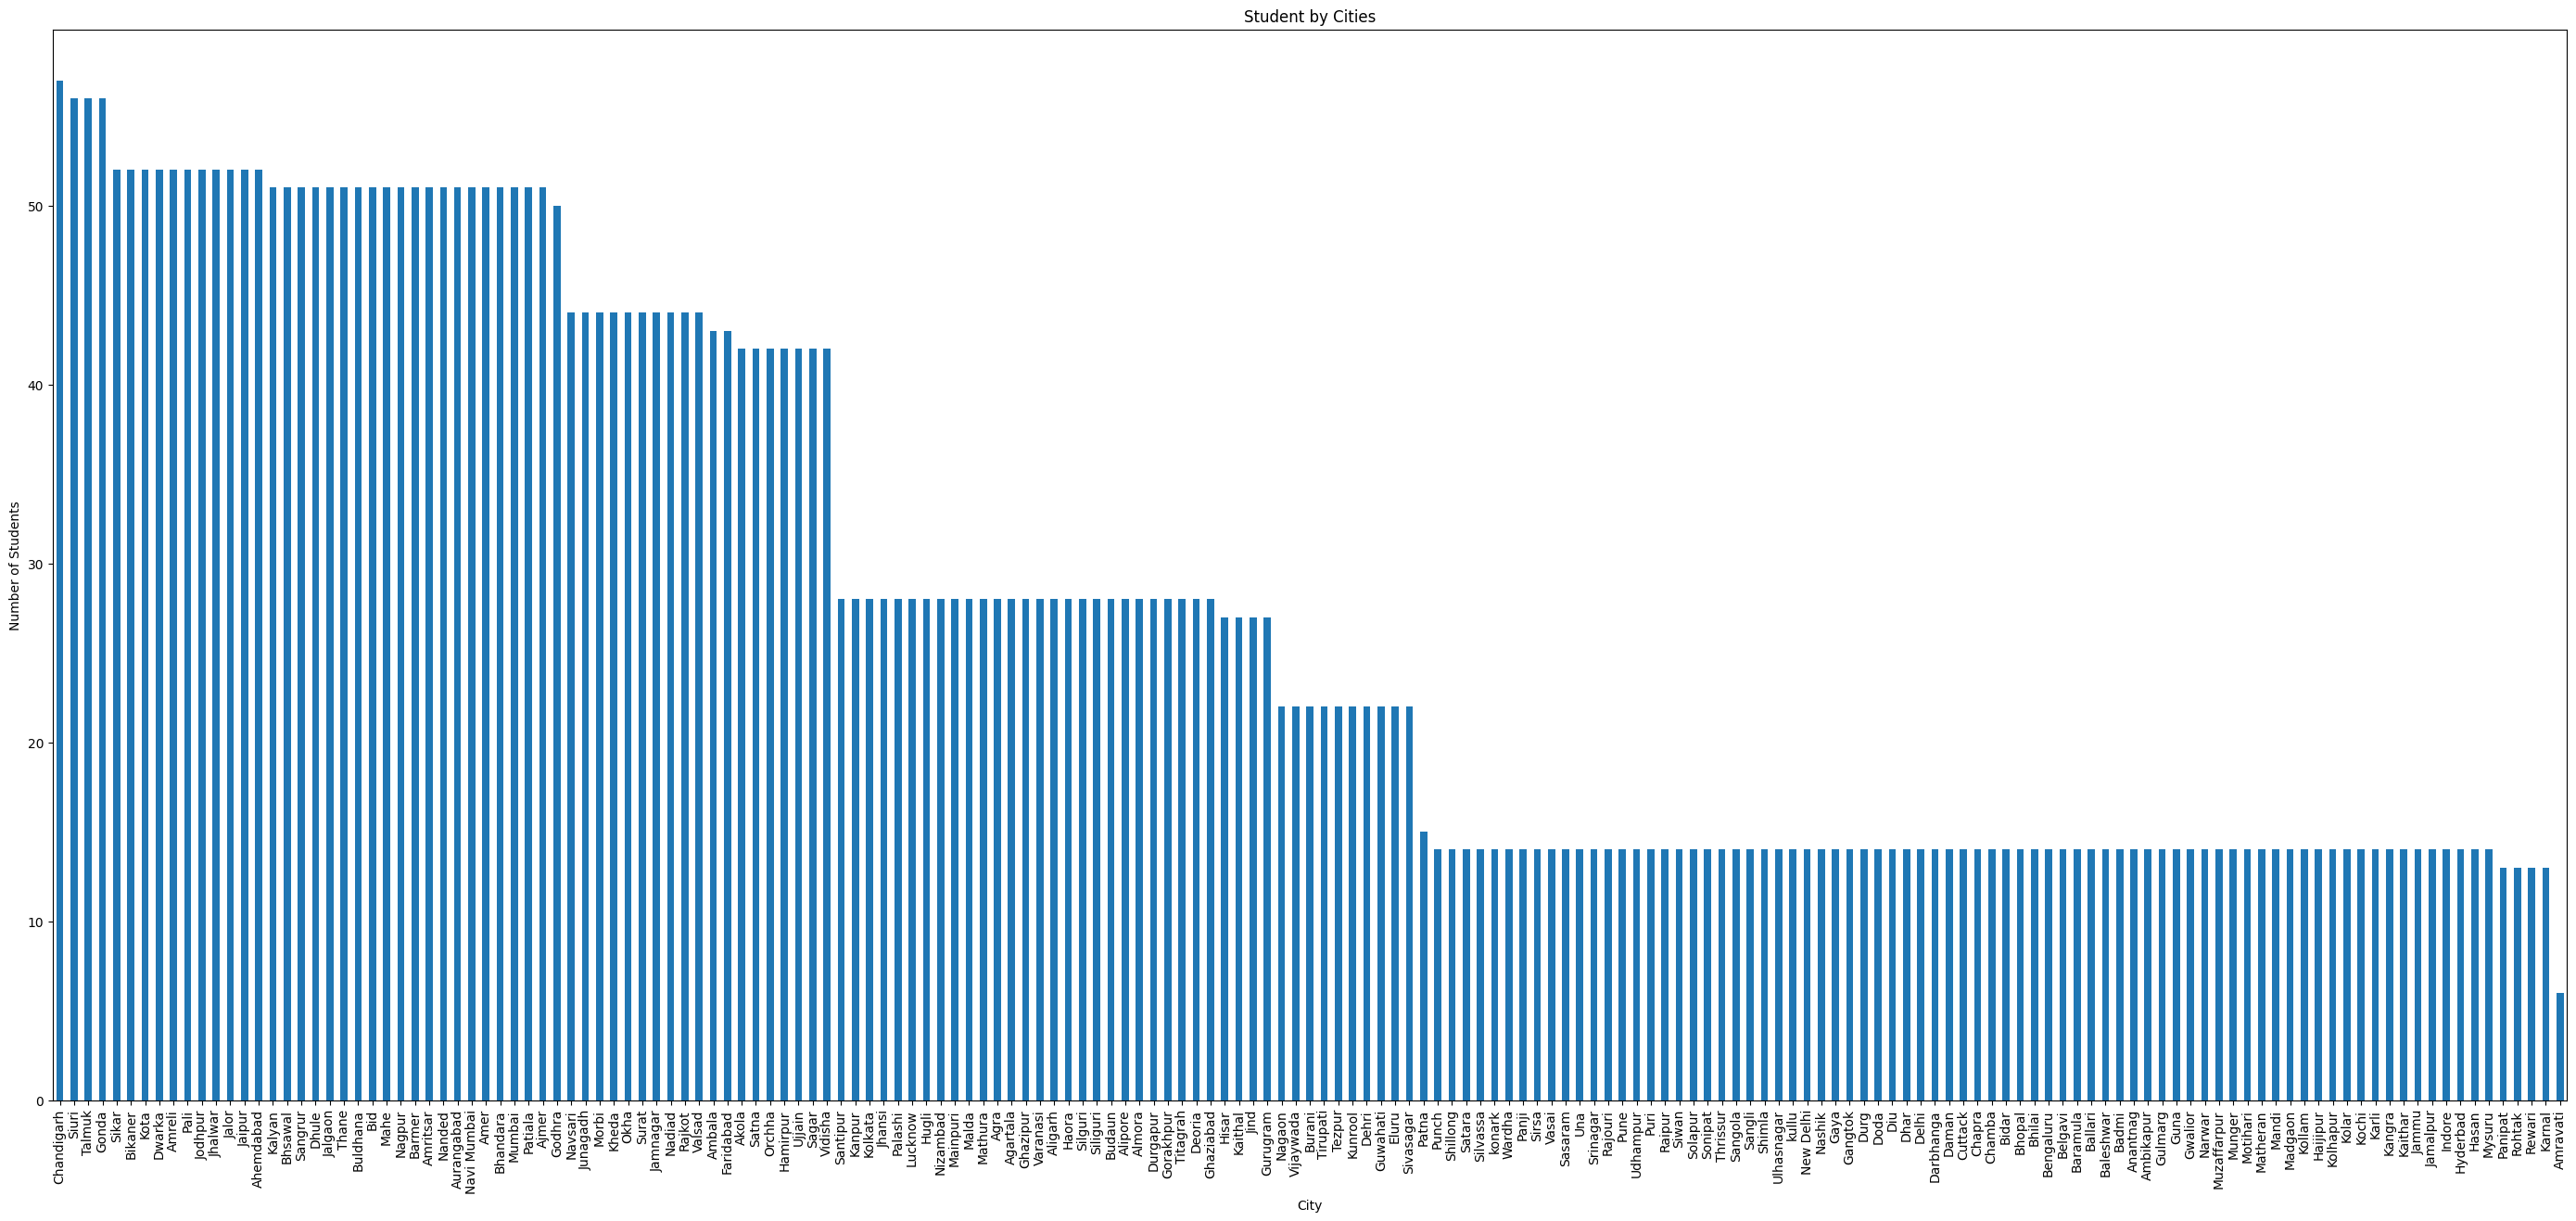

,City,Number of Students
0,Chandigarh,57
1,Siuri,56
2,Talmuk,56
3,Gonda,56
4,Sikar,52
...,...,...
172,Panipat,13
173,Rohtak,13
174,Rewari,13
175,Karnal,13


In [224]:

student_by_cities = data.groupby('City')['First Name'].count()
student_by_cities.sort_values(ascending=False,inplace=True)
student_by_cities.plot(kind='bar',figsize=(35, 15))
plt.title('Student by Cities')
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.show()
student_by_cities = pd.DataFrame(student_by_cities)
student_by_cities.rename(columns={'City':'City','First Name':'Number of Students'},inplace=True)
student_by_cities.reset_index(inplace=True)
student_by_cities

## 10. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?

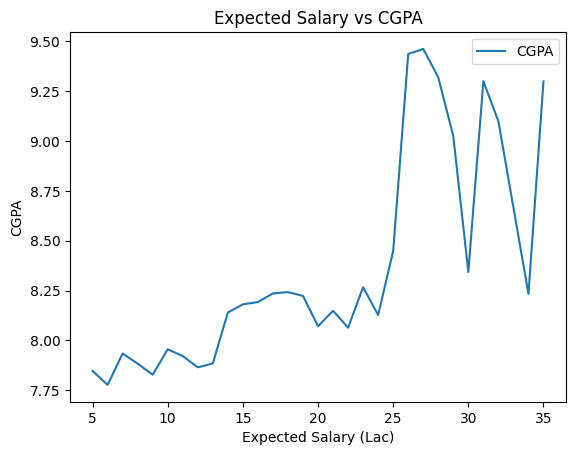

In [225]:
# Expected Salary vs GPA
expected_salary_vs_GPA = data.groupby('Expected salary (Lac)')['CGPA'].mean()
expected_salary_vs_GPA.plot(kind='line', x='Expected salary (Lac)', y='CGPA', legend=True)
plt.title('Expected Salary vs CGPA')
plt.xlabel('Expected Salary (Lac)')
plt.ylabel('CGPA')
plt.show()


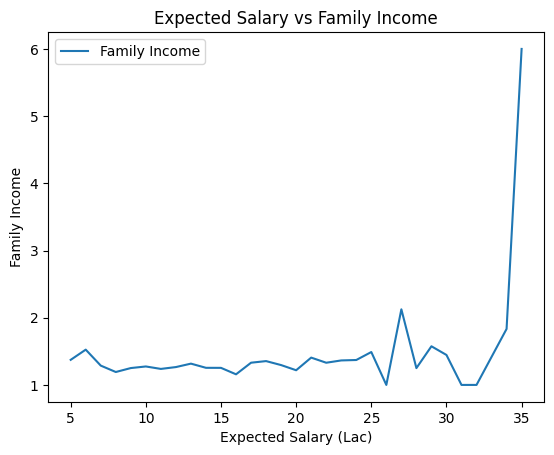

In [226]:
# Expected Salary vs Family Income
expected_salary_vs_GPA = data.groupby('Expected salary (Lac)')['Family Income'].mean()
expected_salary_vs_GPA.plot(kind='line', x='Expected salary (Lac)', y='Family Income', legend=True)
plt.title('Expected Salary vs Family Income')
plt.xlabel('Expected Salary (Lac)')
plt.ylabel('Family Income')
plt.show()

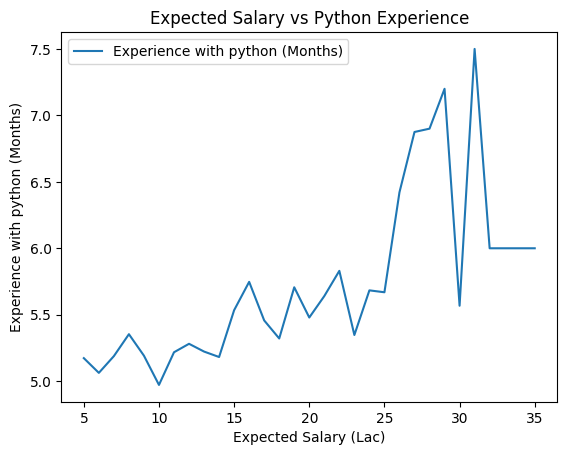

In [227]:
# Expected Salary vs Python Experience
expected_salary_vs_GPA = data.groupby('Expected salary (Lac)')['Experience with python (Months)'].mean()
expected_salary_vs_GPA.plot(kind='line', x='Expected salary (Lac)', y='Experience with python (Months)', legend=True)
plt.title('Expected Salary vs Python Experience')
plt.xlabel('Expected Salary (Lac)')
plt.ylabel('Experience with python (Months)')
plt.show()

## 11. Which event tend to attract more students from specific fields of study?

In [228]:
event_counts = data['Events'].value_counts()
print("Event with most number of students:", event_counts.idxmax())
print("Number Of Students: ", event_counts.max())

Event with most number of students: Product Design & Full Stack
Number Of Students:  842


## <span style='color:Green'>Conclusion </span> : Event with most number of students: Product Design & Full Stack and Number Of Students:  842

## 12. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [229]:
# Checking Leadership Columns for impurites
print(data['Leadership- skills'].unique())

['yes' 'no' 'no ']


In [230]:
# replacing 'no ' with 'no'
data['Leadership- skills'] = data['Leadership- skills'].str.replace('no ', 'no')
print(data['Leadership- skills'].unique())

['yes' 'no']


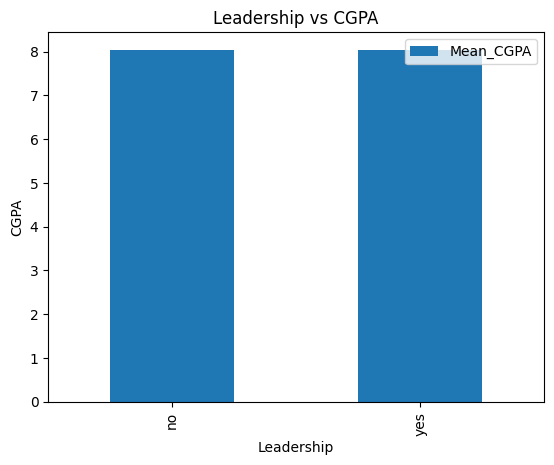

In [231]:
leadership_vs_cgpa = data.groupby(['Leadership- skills'])['CGPA'].mean().reset_index()
leadership_vs_cgpa.columns = ['Leadership','Mean_CGPA']

leadership_vs_cgpa.plot(x='Leadership',y='Mean_CGPA',kind='bar')
plt.title('Leadership vs CGPA')
plt.xlabel('Leadership')
plt.ylabel('CGPA')
plt.show()


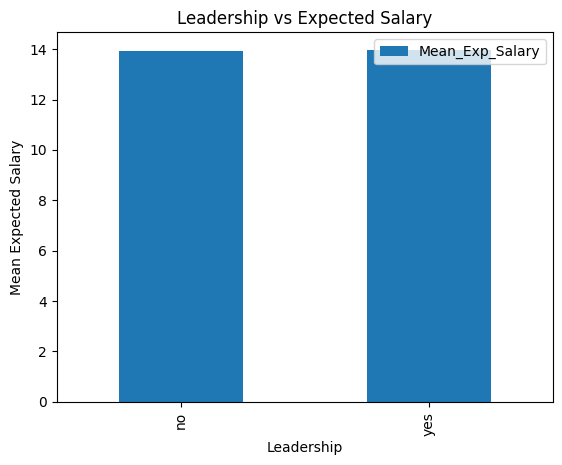

In [232]:
leadership_vs_exp_salary = data.groupby(['Leadership- skills'])['Expected salary (Lac)'].mean().reset_index()
leadership_vs_exp_salary.columns = ['Leadership','Mean_Exp_Salary']

leadership_vs_exp_salary.plot(x='Leadership',y='Mean_Exp_Salary',kind='bar')
plt.title('Leadership vs Expected Salary')
plt.xlabel('Leadership')
plt.ylabel('Mean Expected Salary')
plt.show()


## <span style='color:Green'>Conclusion </span> : There is no special relation between Leadership Skills with GPA or Expected Salary

## 13. How many students are graduating by the end of 2024?

In [233]:
graduating_2024 = data['Year of Graduation'] == 2024
print(f"Students graduating in 2024: {graduating_2024.sum()}")

Students graduating in 2024: 1511


## <span style='color:Green'>Conclusion </span> : Students graduating in 2024: 1511

## 14. Which promotion channel brings in more student participations for the event?

In [234]:
print(data['How did you come to know about this event?'].unique())

['Email' 'Others' 'Instagram | LinkedIn | Cloud Counselage Website'
 'Whatsapp' 'LinkedIn' 'Cloud Counselage Website'
 'Instagram | Whatsapp | Email' 'Youtube' 'Whatsapp | Others'
 'Instagram | Whatsapp' 'Youtube | Whatsapp | Email' 'Facebook'
 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email'
 'Instagram | Email' 'LinkedIn | Email | Cloud Counselage Website'
 'Youtube | Facebook | Instagram | Whatsapp | Email' 'Email | Others'
 'LinkedIn | Whatsapp' 'Youtube | Facebook'
 'Email | Cloud Counselage Website' 'Whatsapp | Email' 'LinkedIn | Email'
 'Youtube | Email'
 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website'
 'Facebook | Whatsapp' 'Youtube | Whatsapp'
 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website | Others'
 'Youtube | Facebook | Whatsapp | Email' 'Facebook | Instagram'
 'Email | SPOC/ College Professor' 'SPOC/ College Professor'
 'Cloud Counselage Website | Others' nan
 'Whatsapp | SPOC

In [235]:
def split_values(value):
    if pd.isna(value):
        return []
    else:
        return [v.strip() for v in value.split('|')]
                
data_platform = data.copy()
data_platform['How did you come to know about this event?'] = data_platform['How did you come to know about this event?'].apply(split_values)
data_platform = data_platform.explode('How did you come to know about this event?')
platform_counts = data_platform['How did you come to know about this event?'].value_counts()
print(data_platform['How did you come to know about this event?'].unique())

['Email' 'Others' 'Instagram' 'LinkedIn' 'Cloud Counselage Website'
 'Whatsapp' 'Youtube' 'Facebook' 'SPOC/ College Professor' nan
 'Friend/ Classmate' 'Telegram' 'Twitter']


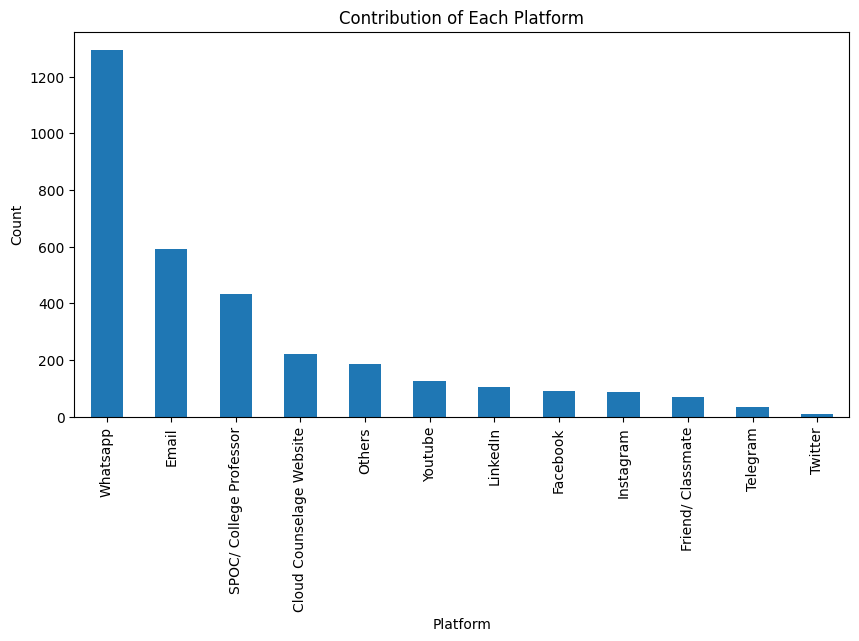

In [236]:

plt.figure(figsize=(10,5))
platform_counts.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Contribution of Each Platform')
plt.xticks(rotation=90)
plt.show()

## <span style='color:Green'>Conclusion </span> : WhatsApp shows the most amount of student participations.

## 15. Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

In [237]:
print(data['Events'].unique())

['Art of Resume Building' 'Data Visualization using Power BI'
 'Artificial Intelligence' 'Hello ML and DL' 'Product Marketing'
 'IAC - Q&A' 'Internship Program(IP) Success Conclave'
 'IS DATA SCIENCE FOR YOU?' 'KYC - Know Your CCPC'
 'Product Design & Full Stack' 'RPA: A Boon or A Bane'
 'Skill and Employability Enhancement'
 'Talk on Skill and Employability Enhancement' 'The Agile Ways of Working'
 'The SDLC & their transformations'
 'Transformation with DevOps: The Easy Way']


In [238]:
data_science_related_courses = ['Data Visualization using Power BI', 'Artificial Intelligence', 'Hello ML and DL', 'IS DATA SCIENCE FOR YOU?']

mask = data['Events'].isin(data_science_related_courses)
course_counts = data.loc[mask, 'Events'].value_counts()
print(f"Number of students who attended events related to Data Science: {course_counts.sum()}")

Number of students who attended events related to Data Science: 1148


## <span style='color:Green'>Conclusion </span> : Number of students who attended events related to Data Science: 1148

## 16. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [239]:
# We will consider High CGPA/More Exp/High Salary Exp as High CGPA/More Exp/High Salary that are above average
average_gpa = data['CGPA'].mean()
average_exp = data['Experience with python (Months)'].mean()
average_salary_exp = data['Expected salary (Lac)'].mean()

In [240]:
high_cgpa_exp_salary_students = pd.DataFrame()
high_cgpa_exp_salary_students = data[(data['CGPA'] > average_gpa) & (data['Experience with python (Months)'] > average_exp) & (data['Expected salary (Lac)'] > average_salary_exp)]
high_cgpa_exp_salary_students.reset_index(inplace=True)
high_cgpa_exp_salary_students

,index,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,14,Saba,saba@xyz.com,1,Art of Resume Building,Attending,New horizon institute of Technology and Manage...,Whatsapp,NaN,Students,2023,Gaya,9.5,7,1.0,20,yes
1,18,Shubham,shubham@xyz.com,1,Art of Resume Building,Attending,Wilson college,Others,College,Students,2024,Munger,9.1,7,1.0,21,yes
2,22,Manasi,manasi@xyz.com,1,Art of Resume Building,Attending,LOKMANYA TILAK COLLEGE OF ENGINEERING KOPARKHA...,Instagram | Whatsapp | Email,NaN,Students,2023,Siwan,8.4,7,1.0,14,no
3,25,Harshal,harshal@xyz.com,1,Art of Resume Building,Attending,ADHIYAMAAN COLLEGE OF ENGINEERING,Whatsapp,NaN,Students,2025,Raipur,8.3,7,3.5,14,no
4,42,Mrunali,mrunali@xyz.com,1,Art of Resume Building,Attending,"MIT Academy Of Engineering ,Alandi",Whatsapp,NaN,Students,2023,Valsad,9.5,7,1.0,21,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,4843,Leakhaa,leakhaa@xyz.com,1,The Agile Ways of Working,Attending,lokmanya tilak college of engineering koparkha...,LinkedIn,NaN,Students,2024,Morbi,8.4,6,1.0,19,no
686,4846,Nishaathiry.k,nishaathiry.k@xyz.com,1,The Agile Ways of Working,Attending,chhattisgarh swami vivekananda technical unive...,Whatsapp,NaN,Students,2023,Okha,8.7,6,1.0,18,no
687,4875,Haiya,haiya@xyz.com,1,The SDLC & their transformations,Attending,"kle society's college of bca, rls institute, b...",Facebook,NaN,Students,2025,Buldhana,9.8,8,1.0,30,no
688,4877,KASUNDRA,kasundra@xyz.com,1,The SDLC & their transformations,Attending,"mit academy of engineering ,alandi",Facebook,NaN,Students,2024,Mumbai,9.5,8,1.0,19,no
